In [47]:
#Importando biblioteca
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [48]:
df = pd.read_csv('StudentsPerformance.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [50]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [51]:
# renomeie as colunas
df = df.rename(columns={
    'gender': 'genero',
    'race/ethnicity': 'raca_etnia',
    "parental level of education": 'escolaridade_pais',
    'lunch': 'lanche',
    'test preparation course': 'preparacao_teste',
    'math score': 'nota_matematica',
    'reading score': 'nota_leitura',
    'writing score': 'nota_escrita'
})

# confira resultado
print(df.columns)
display(df.head())

Index(['genero', 'raca_etnia', 'escolaridade_pais', 'lanche',
       'preparacao_teste', 'nota_matematica', 'nota_leitura', 'nota_escrita'],
      dtype='object')


,genero,raca_etnia,escolaridade_pais,lanche,preparacao_teste,nota_matematica,nota_leitura,nota_escrita
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [52]:
df['genero'] = df['genero'].replace({'female': 'Mulher', 'male': 'Homem'})
df['genero'].value_counts()

genero
Mulher    518
Homem     482
Name: count, dtype: int64

In [53]:
df['escolaridade_pais'] = df['escolaridade_pais'].replace({"associate's degree": "associado", "bachelor's degree": "bacharelado", "master's degree": "mestrado", "high school": "ensino_medio", "some college": "alguma_faculdade", "some high school": "ensino_medio_incompleto"})
df['escolaridade_pais'].value_counts()

escolaridade_pais
alguma_faculdade           226
associado                  222
ensino_medio               196
ensino_medio_incompleto    179
bacharelado                118
mestrado                    59
Name: count, dtype: int64

In [54]:
df['lanche'] = df['lanche'].replace({'standard': 'Padrão', 'free/reduced': 'Gratuito_reduzido'})
df['lanche'].value_counts()

lanche
Padrão               645
Gratuito_reduzido    355
Name: count, dtype: int64

In [55]:
df['preparacao_teste'] = df['preparacao_teste'].replace ({'none': 'Nenhuma', 'completed': 'Completa'})
df['preparacao_teste'].value_counts()

preparacao_teste
Nenhuma     642
Completa    358
Name: count, dtype: int64

In [74]:
# Passo 1: Agrupamento numérico
# Estamos dizendo: "Pegue o DF, agrupe pela coluna 'preparacao_teste' 
# e me dê a MÉDIA (.mean) apenas das colunas de notas."
tabela_roi = df.groupby('preparacao_teste')[['nota_matematica', 'nota_leitura', 'nota_escrita']].mean()

# Vamos calcular a diferença (Gap) para facilitar a leitura
# (Isso ajuda a responder o "quanto" melhora)
tabela_roi['diferenca_matematica'] = tabela_roi['nota_matematica'] - tabela_roi['nota_matematica'].min() 

print("--- Médias de Notas por Preparação ---")
display(tabela_roi)

--- Médias de Notas por Preparação ---


,nota_matematica,nota_leitura,nota_escrita,diferenca_matematica
preparacao_teste,,,,
Completa,69.695531,73.893855,74.418994,5.617649
Nenhuma,64.077882,66.534268,64.504673,0.000000


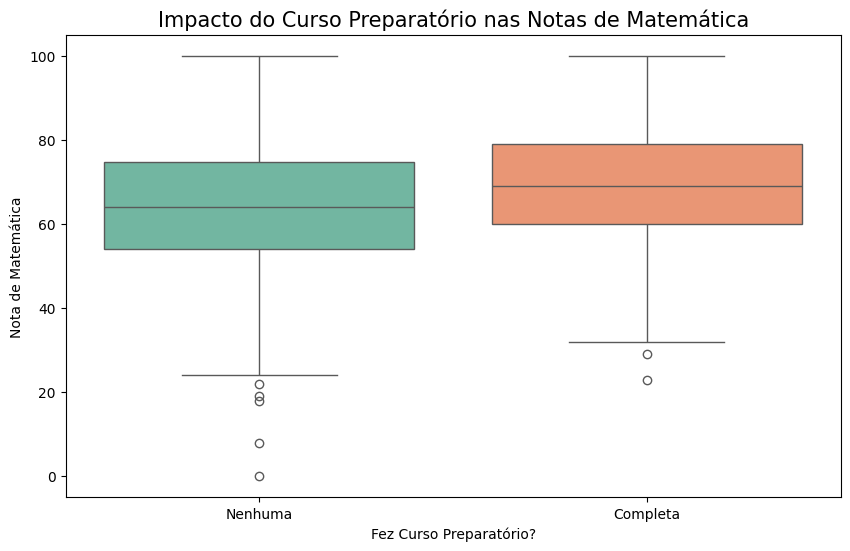

In [ ]:
# Passo 2: Visualização da Distribuição
plt.figure(figsize=(10, 6)) # Define o tamanho da figura (10 largura, 6 altura)

# Criando o Boxplot
# x = O que divide os grupos
# y = O que queremos medir (a nota)
# palette = cores bonitas
grafico = sns.boxplot(data=df, x='preparacao_teste', y='nota_matematica', palette='Set2', hue='preparacao_teste')

plt.title('Impacto do Curso Preparatório nas Notas de Matemática', fontsize=15)
plt.ylabel('Nota de Matemática')
plt.xlabel('Fez Curso Preparatório?')
plt.show()

--- Média por Tipo de Lanche ---


,nota_matematica,nota_leitura,nota_escrita
lanche,,,
Gratuito_reduzido,58.921127,64.653521,63.022535
Padrão,70.034109,71.654264,70.823256


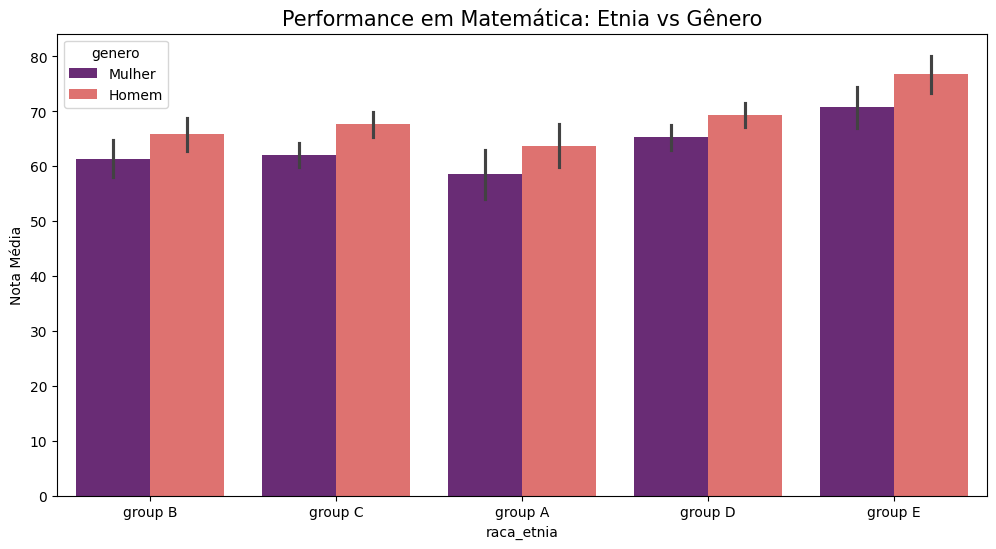

In [ ]:
# Desafio 2: Vulnerabilidade e Equidade (O impacto do Lanche)
# 1. Agrupando por Lanche para ver a média bruta
analise_lanche = df.groupby('lanche')[['nota_matematica', 'nota_leitura', 'nota_escrita']].mean()
print("--- Média por Tipo de Lanche ---")
display(analise_lanche)

# 2. Criando um gráfico para ver Etnia e Gênero juntos
plt.figure(figsize=(12, 6))

# sns.barplot cria barras
# x='raca_etnia': grupos A, B, C, D, E no eixo horizontal
# y='nota_matematica': a altura da barra
# hue='genero': separa cada etnia em duas barras (Homem e Mulher)
sns.barplot(data=df, x='raca_etnia', y='nota_matematica', hue='genero', palette='magma')

plt.title('Performance em Matemática: Etnia vs Gênero', fontsize=15)
plt.ylabel('Nota Média')
plt.show()

In [79]:
# Desafio 3: O "Teto" da Escolaridade Parental
# 1. Calculando as médias agrupadas por escolaridade dos pais
analise_pais = df.groupby('escolaridade_pais')[['nota_matematica', 'nota_leitura', 'nota_escrita']].mean()

# 2. Ordenando do maior para o menor (para facilitar a leitura do Diretor)
analise_pais = analise_pais.sort_values(by='nota_matematica', ascending=False)

print("--- Médias por Escolaridade dos Pais ---")
display(analise_pais)

# 3. Visualização interativa com Plotly (para você aprender uma ferramenta nova)
# Esse gráfico permite passar o mouse em cima e ver o valor exato!
fig = px.bar(analise_pais, 
             x='nota_matematica', 
             y=analise_pais.index,
             orientation='h',
             title='Escolaridade dos Pais vs Nota de Matemática',
             labels={'nota_matematica': 'Média em Matemática', 'escolaridade_pais': 'Escolaridade'},
             color='nota_matematica',
             color_continuous_scale='Viridis')

fig.show()

--- Médias por Escolaridade dos Pais ---


,nota_matematica,nota_leitura,nota_escrita
escolaridade_pais,,,
mestrado,69.745763,75.372881,75.677966
bacharelado,69.389831,73.000000,73.381356
associado,67.882883,70.927928,69.896396
alguma_faculdade,67.128319,69.460177,68.840708
ensino_medio_incompleto,63.497207,66.938547,64.888268
ensino_medio,62.137755,64.704082,62.448980


In [80]:
# 1. Criando uma coluna de 'Media_Geral' para facilitar a visão do chefe
df['media_geral'] = (df['nota_matematica'] + df['nota_leitura'] + df['nota_escrita']) / 3

# 2. Criando o Resumo Executivo em uma única tabela
# Vamos agrupar por Preparação para mostrar o ROI de novo, mas com a média de todas as matérias
resumo_final = df.groupby('preparacao_teste')[['nota_matematica', 'nota_leitura', 'nota_escrita', 'media_geral']].mean()

print("--- RELATÓRIO DE PERFORMANCE ACADÊMICA ---")
display(resumo_final.round(2)) # .round(2) deixa o número bonito com 2 casas decimais

# 3. Salvando o resultado em um arquivo Excel (Opcional, se você tiver o openpyxl instalado)
# resumo_final.to_excel("relatorio_escola_excelencia.xlsx")
# print("\n✅ Arquivo Excel gerado com sucesso!")

--- RELATÓRIO DE PERFORMANCE ACADÊMICA ---


,nota_matematica,nota_leitura,nota_escrita,media_geral
preparacao_teste,,,,
Completa,69.70,73.89,74.42,72.67
Nenhuma,64.08,66.53,64.50,65.04


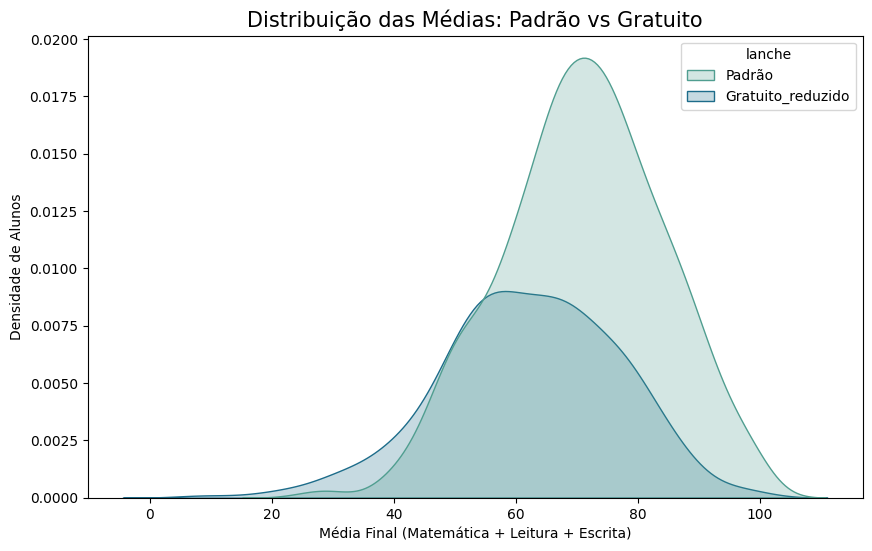

In [81]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="media_geral", hue="lanche", fill=True, palette="crest")
plt.title("Distribuição das Médias: Padrão vs Gratuito", fontsize=15)
plt.xlabel("Média Final (Matemática + Leitura + Escrita)")
plt.ylabel("Densidade de Alunos")
plt.show()